In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_height,img_width=(224,224)
batch_size=32
detect = ["Aadhar Card" , "PAN Card","Unknown"]
train_data_dir=r"RES_DATA\train"
#valid_data_dir=r"RES_DATA\val"
test_data_dir=r"RES_DATA\test"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')


    
                                   

Found 255 images belonging to 3 classes.


In [4]:
test_generator = train_datagen.flow_from_directory(
     test_data_dir,
     target_size=(img_height,img_width),
     batch_size=1,
     class_mode='categorical',
     subset='validation')
    

Found 27 images belonging to 3 classes.


In [5]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [9]:
base_model= ResNet50(include_top=False,weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(train_generator.num_classes,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=predictions)
for layer in base_model.layers:
    layer.trainable=False
    
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_generator,
                        epochs=3)

Epoch 1/3
8/8 [==============================] - 14s 2s/step - loss: 1.6014 - accuracy: 0.7098
Epoch 2/3
8/8 [==============================] - 13s 2s/step - loss: 0.1287 - accuracy: 0.9451
Epoch 3/3
8/8 [==============================] - 14s 2s/step - loss: 4.8403e-04 - accuracy: 1.0000


In [10]:
model.save('KYC_verification.h5')

In [11]:
test_loss,test_acc = model.evaluate(test_generator,verbose=2)
print('\nTest Accuracy:',test_acc)

27/27 - 2s - loss: 0.0098 - accuracy: 1.0000

Test Accuracy: 1.0


[[0.0029032  0.73822016 0.2588767 ]]
1
PAN Card


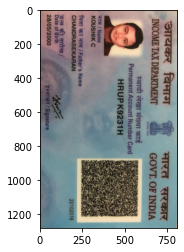

In [12]:
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

def classify(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)

    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)

    
    model = load_model('KYC_verification.h5')
    prediction = model.predict(img_preprocessed)
    print(prediction)
    preds=np.argmax(prediction)
    print(preds)
    print(detect[preds])

classify("RES_DATA/testimage3.JPG")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('RES_DATA/testimage3.JPG')
imgplot = plt.imshow(img)
plt.show()

In [14]:
'''
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from skimage.transform import resize
import pandas as pd
import seaborn as sn
import tensorflow as tf

filenames=test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class=[list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class=[list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]
out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix= pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('Test Accuracy: {}',format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))
'''

"\nfrom sklearn.metrics import classification_report, accuracy_score, confusion_matrix\nfrom skimage.transform import resize\nimport pandas as pd\nimport seaborn as sn\nimport tensorflow as tf\n\nfilenames=test_generator.filenames\nnb_samples = len(test_generator)\ny_prob=[]\ny_act=[]\ntest_generator.reset()\nfor _ in range(nb_samples):\n    X_test,Y_test = test_generator.next()\n    y_prob.append(model.predict(X_test))\n    y_act.append(Y_test)\n    \npredicted_class=[list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]\nactual_class=[list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]\nout_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])\nconfusion_matrix= pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])\nsn.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')\nplt.show()\nprint('Test Accuracy: {}',format((np.diagonal(confusion_matr

In [13]:
#print(classification_report(predicted_class, actual_class))